<a href="https://colab.research.google.com/github/Sukhdeep2006/Learning-TensorFlow/blob/main/002_TF_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST
is a dataset of 70K images of clothing items and we will try to train a model to correctly identifying the clothing items. We will use the TansorFlow Dense layer (which is also called a fully connected layer) to identify the images.

Lets dig into it.



### Lets first import all the libraries we would need throughout this notebook

In [ ]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import tensorflow.keras.layers as ll
import math
import numpy as np
import matplotlib.pyplot as plt

### Lets load the MNIST dataset and verify the count of training and test records.

In [ ]:

dataset, metadata = tfds.load("fashion_mnist", as_supervised= True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print( "Count of Training Records: ",num_train_examples)
print("Count of Test Records: ",num_test_examples)

class_names = ['T-Shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5UGYOZ/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5UGYOZ/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Count of Training Records:  60000
Count of Test Records:  10000


### We know the images in the dataset are greyscale and represents the pixel values between 0 to 255. We will normalise the input data before using it into our model.

In [ ]:
def normalize(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


### Lets take a look at one of the example (image, label) from our training dataset


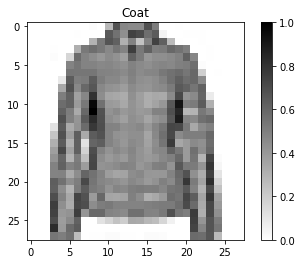

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.title(class_names[label])
plt.grid(False)
plt.show()

### Lets randomly chose 25 images and visualise these to ensure what we have in the dataset is right.

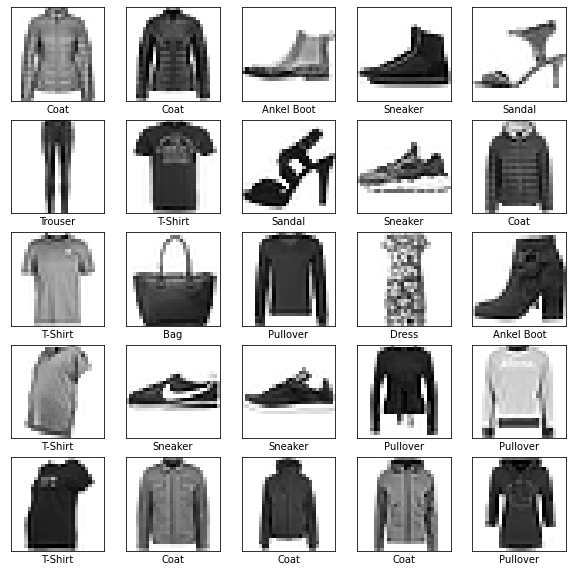

In [ ]:
plt.figure(figsize = (10,10))
i =0
for image, label in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1

plt.show()

### Its now time to start building our model

We will first flatter the input image to a vector (1 dimesional array).
And we will feed the flattened input to a Dense layer with 128 activatin units.
And then we will use the 10 unit SoftMax to provide us the final output (as probabilities)

In [ ]:
model = tf.keras.Sequential([ll.Flatten(input_shape =(28,28,1)),
                             ll.Dense(64, activation=tf.nn.relu),
                             ll.Dense(32, activation=tf.nn.relu),
                             ll.Dense(10, activation=tf.nn.softmax)
                             ])

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
history = model.fit(train_dataset, epochs= 20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 15s 4ms/step - loss: 0.5332 - accuracy: 0.8136
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8585
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3490 - accuracy: 0.8729
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3272 - accuracy: 0.8807
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3119 - accuracy: 0.8855
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2966 - accuracy: 0.8905
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2831 - accuracy: 0.8946
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.8979
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2650 - accuracy: 0.9006
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.26

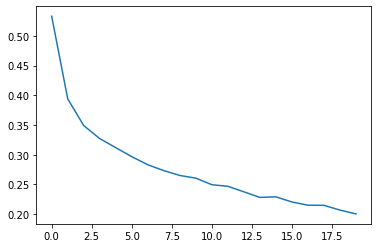

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset , steps = math.ceil(num_test_examples/32))


# 313/313 [==============================] - 1s 4ms/step - loss: 0.3692 - accuracy: 0.8679

313/313 [==============================] - 2s 6ms/step - loss: 0.3610 - accuracy: 0.8843


### After training, we can see that our model is able to predict the putputs with a accuracy of 86.79% on the test dataset.

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  print(test_images.shape, test_labels.shape, predictions.shape)

(32, 28, 28, 1) (32,) (32, 10)


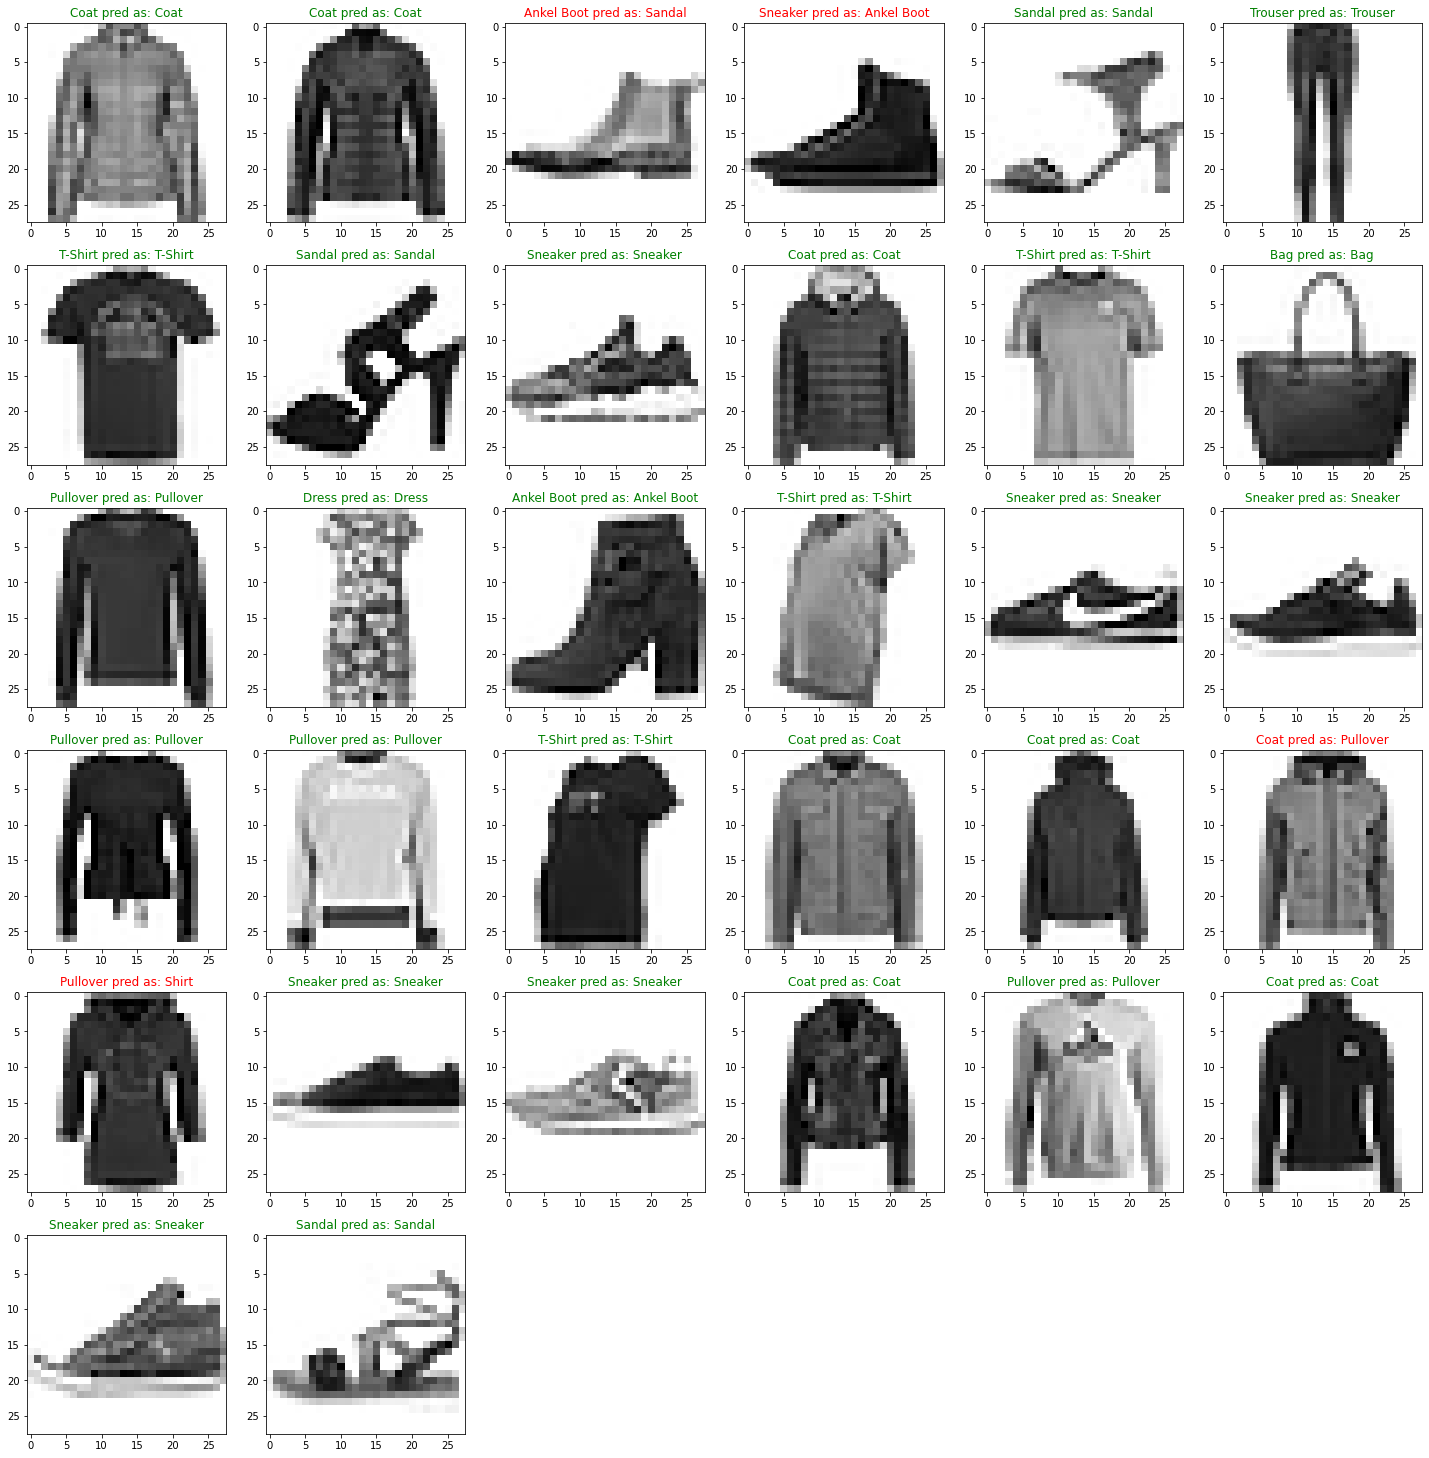

In [ ]:
plt.figure(figsize=(25,26))
for i in range(32):
  test_img = test_images[i].reshape((28,28))
  test_label = class_names[test_labels[i]]
  prediction = class_names[np.argmax(predictions[i])]
  #print(test_label, prediction)
  plt.subplot(6,6,i+1)
  plt.imshow(test_img, cmap = plt.cm.binary)
  if test_label == prediction:
    clr = 'green'
  else:
    clr = 'red'
  plt.title(test_label + ' pred as: '+ prediction, color = clr)